In [311]:
%matplotlib inline

import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import time
import datetime

In [312]:
#path = "/media/sf_as/Dropbox/files/DSScale/visual/as1_crime/"
sf_crime_url = "https://raw.githubusercontent.com/uwescience/datasci_course_materials/master/assignment6/sanfrancisco_incidents_summer_2014.csv"
def readData():
    df = pd.read_csv(sf_crime_url)
    #df = pd.read_csv(path + "sanfrancisco_incidents_summer_2014.csv")
    #print df.shape
    #print df.dtypes
    #print df.columns
    #print df.head()
    return df

In [313]:
def binify(df):
    t = []
    cat = []
    count = []
    for k,g in df.groupby(['Time', 'Category']):
        #print k, len(g)
        t.append(k[0].split(':')[0])
        cat.append(k[1])
        count.append(len(g))
    grp = pd.DataFrame(t, columns=['time'])
    grp['cat'] = cat
    grp['count'] = count
    #print grp.shape
    #print grp.head()
    
    t = []
    cat = []
    count = []    
    for k,g in grp.groupby(['time', 'cat']):
        #print k, len(g)
        t.append(k[0])
        cat.append(k[1])
        count.append(g['count'].sum())
    res = pd.DataFrame(t, columns=['time'])
    res['cat'] = cat
    res['count'] = count    
    #print res.shape
    #print res.head(30)
    
    return res

In [314]:
def calcPeriod(df):
    a = df.loc[df.index[0], 'Date'] 
    b = df.loc[df.index[len(df)-1], 'Date']
    #print a
    a = datetime.datetime.strptime(a, "%m/%d/%Y")
    b = datetime.datetime.strptime(b, "%m/%d/%Y")
    delta = a - b
    #print delta.days
    return delta.days

In [315]:
def plotHourlyCrime(res, days, cat):
    # filter by type of crime
    crime = res[res['cat']==cat]
    
    plt.plot(crime['time'], crime['count']/days)
    plt.title('San Francisco - Number of ' + cat + ' Incidents (hourly mean)')
    plt.xlim([0,23])
    plt.xticks(np.arange(0, 24, 1))
    plt.show()    

In [316]:
def dataProcessing():
    # load the data into a pandas dataframe
    df = readData()
    
    # count the number of records per type of arrest 
    # grouping into bins for each whole hour of the day
    res = binify(df)
    
    # count the total number of days in the dataset
    # needed to calculate the daily mean of the arrest counts
    days = calcPeriod(df)
    
    return res, days


In [317]:
res, days = dataProcessing()

# Finding: SF crime incidents show clear hourly patterns
Our analysis reveals that there are strong patterns in the hourly frequency 
of certain categories of incidents that may be helpful to optimize 
the schedule the prevention efforts by police and other city personnel.

## Larceny incidents increase steadily during the day and peak at about 19:00 hours


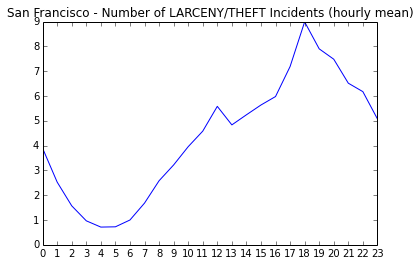

In [318]:
    plotHourlyCrime(res, days, 'LARCENY/THEFT')


### Robberies peak at luch time
One could speculate this is because the perpetrators are targetting the hours when meny employees are taking their lunch break.


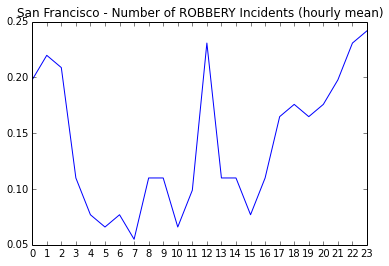

In [319]:
    plotHourlyCrime(res, days, 'ROBBERY')


### Suicides occur from midnight to down
All the incidents reported happened after midnight and before down

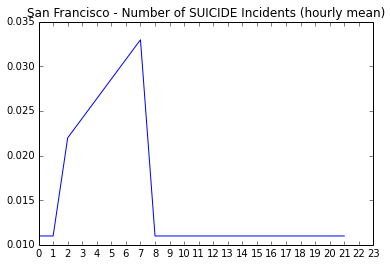

In [320]:
    plotHourlyCrime(res, days, 'SUICIDE')